In [1]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
series = np.sin(0.1*np.arange(200)) + np.random.rand(200)*

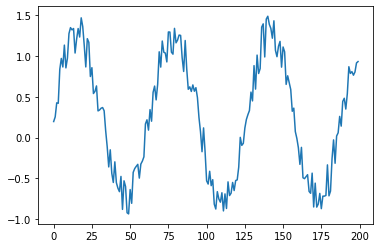

In [3]:
plt.plot(series)
plt.show()

In [4]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [5]:
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)

In [6]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1)
)
r = Model.fit(model, x = X[:N//2], y = Y[:N//2], epochs = 80)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 2ms/sample - loss: 0.3181
Epoch 2/80
95/95 [==============================] - 0s 60us/sample - loss: 0.1225
Epoch 3/80
95/95 [==============================] - 0s 82us/sample - loss: 0.1026
Epoch 4/80
95/95 [==============================] - 0s 56us/sample - loss: 0.1038
Epoch 5/80
95/95 [==============================] - 0s 127us/sample - loss: 0.0769
Epoch 6/80
95/95 [==============================] - 0s 63us/sample - loss: 0.0764
Epoch 7/80
95/95 [==============================] - 0s 63us/sample - loss: 0.0786
Epoch 8/80
95/95 [==============================] - 0s 63us/sample - loss: 0.0590
Epoch 9/80
95/95 [==============================] - 0s 62us/sample - loss: 0.0661
Epoch 10/80
95/95 [==============================] - 0s 74us/sample - loss: 0.0548
Epoch 11/80
95/95 [==============================] - 0s 58us/sample - loss: 0.

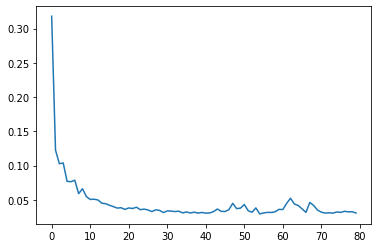

In [7]:
plt.plot(r.history['loss'], label = 'loss')

In [8]:
predictions = []
real = []
for elem in X[N//2:]:
    predictions.append(model.predict(elem.reshape(1,-1))[0][0])
    real.append(elem[9])

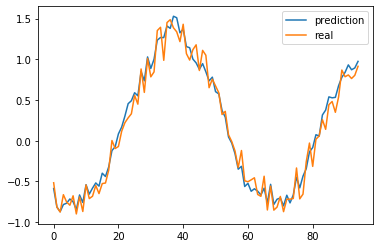

In [9]:
plt.plot(predictions, label='prediction')
plt.plot(real, label='real')
plt.legend()
plt.show()

# Now with a SimpleRNN

In [10]:
newX = np.expand_dims(X, -1)

In [11]:
i = Input(shape=(T,1))
x = SimpleRNN(5, activation='relu')(i)
x = Dense(1)(x)
rnnModel = Model(i,x)
rnnModel.compile(
    loss='mse',
    optimizer=Adam(lr=0.1)
)
r = Model.fit(rnnModel, x = newX[:N//2], y = Y[:N//2], epochs = 80)

Train on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 4ms/sample - loss: 0.5032
Epoch 2/80
95/95 [==============================] - 0s 213us/sample - loss: 0.3505
Epoch 3/80
95/95 [==============================] - 0s 343us/sample - loss: 0.3214
Epoch 4/80
95/95 [==============================] - 0s 324us/sample - loss: 0.2635
Epoch 5/80
95/95 [==============================] - 0s 319us/sample - loss: 0.1344
Epoch 6/80
95/95 [==============================] - 0s 264us/sample - loss: 0.0608
Epoch 7/80
95/95 [==============================] - 0s 214us/sample - loss: 0.0580
Epoch 8/80
95/95 [==============================] - 0s 214us/sample - loss: 0.0929
Epoch 9/80
95/95 [==============================] - 0s 331us/sample - loss: 0.0796
Epoch 10/80
95/95 [==============================] - 0s 230us/sample - loss: 0.0540
Epoch 11/80
95/95 [==============================] - 0s 270us/sample - loss: 0.0467
Epoch 12/80
95/95 [==============================] - 0s 222us/sampl

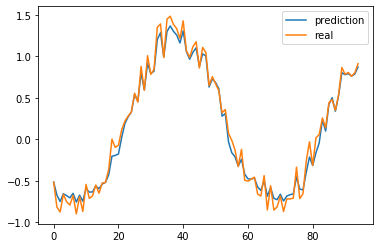

In [13]:
predictions = rnnModel.predict(newX[N//2:]).reshape(N//2,)
plt.plot(predictions, label='prediction')
plt.plot(real, label='real')
plt.legend()
plt.show()